Students: Lepidas Nikolas sdi1600090 and Lamprinos Nikos sdi1600088

Course: Datamining

The puprose of this exercise is to write a program that will be able to "know" if a tweet has positive, negative or neutral sentiment. The steps that we will go through are cleaning, stemming, vectorization and classification. 

The code below will make the cells wider.

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

First of all we create 3 dataframes with every sentiment from the train dataset.

In [2]:
import pandas as pd

train_file = r'../twitter_data/train2017.tsv'
#train_file = r'./small_train.tsv'
dataframe = pd.read_csv(train_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])

grouped = dataframe.groupby('Sentiment')                        #group by Sentiment
positive_tweets = grouped.get_group('positive').reset_index()   #get a dataframe with positive tweets
negative_tweets = grouped.get_group('negative').reset_index()   #get a dataframe with negative tweets
neutral_tweets = grouped.get_group('neutral').reset_index()     #get a dataframe with neutral tweets

In [3]:
#Some printings
print("Positive tweets dataframe:\n")
print (positive_tweets.head())
print('\n')
print("Negative tweets dataframe:\n")
print (negative_tweets.head())
print('\n')
print("Neutral tweets dataframe:\n")
print (neutral_tweets.head())
print ('\n\n\n')
#end of printings

Positive tweets dataframe:

   index                 ID1        ID2 Sentiment  \
0      0  264183816548130816   15140428  positive   
1      6  264105751826538497  147088367  positive   
2     12  263398998675693568  812957996  positive   
3     13  263650552167157762  224845471  positive   
4     15  264087629237202944   61903760  positive   

                                               Tweet  
0  Gas by my house hit $3.39!!!! I'm going to Cha...  
1  with J Davlar 11th. Main rivals are team Polan...  
2  @oluoch @victor_otti @kunjand I just watched i...  
3  One of my best 8th graders Kory was excited af...  
4  @MsSheLahY I didnt want to just pop up... but ...  


Negative tweets dataframe:

   index                 ID1        ID2 Sentiment  \
0      1  263405084770172928  591166521  negative   
1      2  262163168678248449   35266263  negative   
2      3  264249301910310912   18516728  negative   
3      7  264094586689953794  332474633  negative   
4      9  254941790757601280

Below we have a bar chart in order to see how many tweets from our dataset are positive, negative and neutral.

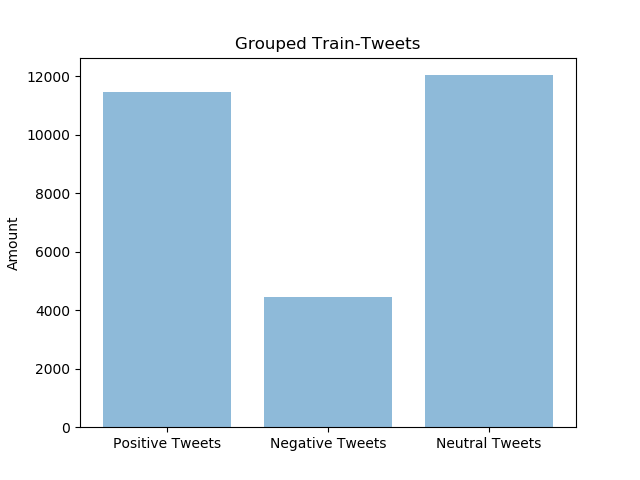

In [4]:
from IPython.display import Image
Image("./images/bar_charts/amount_grouped_tweets.png")

Now we make 3 lists each for every sentiment. So we have positive_tweet list, negative_tweet list and neutral_tweet list.

In [5]:
positive_tweet = []                                                        #create empty positive_tweet list
for x in range(len(positive_tweets)):                                      #for every positive tweet in the previous positives_tweet dataframe
    positive_tweet.append(positive_tweets['Tweet'][x])                     #append only the Tweet column to the list

negative_tweet = []
for x in range(len(negative_tweets)):
    negative_tweet.append(negative_tweets['Tweet'][x])
    
neutral_tweet = []
for x in range(len(neutral_tweets)):
    neutral_tweet.append(neutral_tweets['Tweet'][x])

Now we will clean the tweets from urls, tags, symbols and numbers. We also use lower() function to have only lower letters. 

In [6]:
import re                                                                                                           #import regular expressions

for x in range(len(positive_tweet)):                                                                                #for every tweet in the list of positive tweets
    positive_tweet[x] = re.sub('http://\S+|https://\S+', '', positive_tweet[x])                                     #remove the urls
    positive_tweet[x] = re.sub('@\S+', '', positive_tweet[x])                                                       #remove the tags
    positive_tweet[x] = re.sub('[0-9`~!@#\$%^&\*\(\)\-\_\=\+\[\]\{\}\\\|\;\:<\,.\>\/\?\'\"]','', positive_tweet[x]) #remove the symbols
    positive_tweet[x] = positive_tweet[x].lower()                                                                   #lowercase the letters

for x in range(len(negative_tweet)):
    negative_tweet[x] = re.sub('http://\S+|https://\S+', '', negative_tweet[x])
    negative_tweet[x] = re.sub('@\S+', '', negative_tweet[x])                                                       
    negative_tweet[x] = re.sub('[0-9`~!@#\$%^&\*\(\)\-\_\=\+\[\]\{\}\\\|\;\:<\,.\>\/\?\'\"]','', negative_tweet[x])
    negative_tweet[x] = negative_tweet[x].lower()

for x in range(len(neutral_tweet)):
    neutral_tweet[x] = re.sub('http://\S+|https://\S+', '', neutral_tweet[x])
    neutral_tweet[x] = re.sub('@\S+', '', neutral_tweet[x])                                                       
    neutral_tweet[x] = re.sub('[0-9`~!@#\$%^&\*\(\)\-\_\=\+\[\]\{\}\\\|\;\:<\,.\>\/\?\'\"]','', neutral_tweet[x])
    neutral_tweet[x] = neutral_tweet[x].lower()

We will use function printList to print only 5 elements from the given list. We do that since there is no similar function to head() for lists in python.

In [7]:
def printList(List):
    for i in range(5):
        print(List[i])
    print()

In [8]:
print("Positive tweets after cleaning:\n")
printList(positive_tweet)
print("Negative tweets after cleaning:\n")
printList(negative_tweet)
print("Neutral tweets after cleaning:\n")
printList(neutral_tweet)


Positive tweets after cleaning:

gas by my house hit  im going to chapel hill on sat 
with j davlar th main rivals are team poland hopefully we an make it a successful end to a tough week of training tomorrow
   i just watched it sridevis comeback u remember her from the s sun mornings on nta 
one of my best th graders kory was excited after his touchdown today he did the victor cruzlol 
 i didnt want to just pop up but yep we have chapel hill next wednesday you should come and shes great ill tell her you asked

Negative tweets after cleaning:

theo walcott is still shit watch rafa and johnny deal with him on saturday
its not that im a gsp fan i just hate nick diaz cant wait for february
iranian general says israels iron dome cant deal with their missiles keep talking like that and we may end up finding out
talking about acts  sats deciding where i want to go to college applying to colleges and everything about college stresses me out
they may have a superbowl in dallas but dallas aint

We will use word_tokenize from nltk to tokenize the tweets in order to remove the stopwords.

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nikolas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
#import nltk
from nltk import word_tokenize

positive_tokens = []
for x in range(len(positive_tweet)):                            #for every tweet in list of positive tweets
    positive_tokens.append(word_tokenize(positive_tweet[x]))    #tokenize the tweet and append it to the list of tokens
                                                                #now every tweet is a list of tokens and positive tokens is a list of list of tokens

negative_tokens = []
for x in range(len(negative_tweet)):
    negative_tokens.append(word_tokenize(negative_tweet[x]))

neutral_tokens = []
for x in range(len(neutral_tweet)):
    neutral_tokens.append(word_tokenize(neutral_tweet[x]))


In [12]:
print("Positive tweets after tokenization:\n")
printList(positive_tokens)
print("Negative tweets after tokenization:\n")
printList(negative_tokens)
print("Neutral tweets after tokenization:\n")
printList(neutral_tokens)


Positive tweets after tokenization:

['gas', 'by', 'my', 'house', 'hit', 'im', 'going', 'to', 'chapel', 'hill', 'on', 'sat']
['with', 'j', 'davlar', 'th', 'main', 'rivals', 'are', 'team', 'poland', 'hopefully', 'we', 'an', 'make', 'it', 'a', 'successful', 'end', 'to', 'a', 'tough', 'week', 'of', 'training', 'tomorrow']
['i', 'just', 'watched', 'it', 'sridevis', 'comeback', 'u', 'remember', 'her', 'from', 'the', 's', 'sun', 'mornings', 'on', 'nta']
['one', 'of', 'my', 'best', 'th', 'graders', 'kory', 'was', 'excited', 'after', 'his', 'touchdown', 'today', 'he', 'did', 'the', 'victor', 'cruzlol']
['i', 'didnt', 'want', 'to', 'just', 'pop', 'up', 'but', 'yep', 'we', 'have', 'chapel', 'hill', 'next', 'wednesday', 'you', 'should', 'come', 'and', 'shes', 'great', 'ill', 'tell', 'her', 'you', 'asked']

Negative tweets after tokenization:

['theo', 'walcott', 'is', 'still', 'shit', 'watch', 'rafa', 'and', 'johnny', 'deal', 'with', 'him', 'on', 'saturday']
['its', 'not', 'that', 'im', 'a', 'gsp

We use the stopwords from the nltk.corpus in order to remove the stopwords from the tokenized tweets and finish the cleaning. 

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nikolas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
#positive_tokens is a list of list of tokens

filtered_positive_words = []
filtered_positive_sentences = []
for sentence in range(len(positive_tokens)):                                    #for every list-tweet in tokens
    for word in range(len(positive_tokens[sentence])):                          #take every token-word of the tweet
        if positive_tokens[sentence][word] not in stopwords.words('english'):   #if the token is not a stopword
            filtered_positive_words.append(positive_tokens[sentence][word])     #append the word to the list of filtered positive words
            
    filtered_positive_sentences.append(filtered_positive_words)                 #append the list of non stopwords of the tweet in a list
    filtered_positive_words = []                                                #initialize again the list for the next tweet in the positive_tokens list
                                                                                #here we create a new positive_tokens list of list of tokens that there are
                                                                                #no stopwords  

filtered_negative_words = []
filtered_negative_sentences = []
for sentence in range(len(negative_tokens)):
    for word in range(len(negative_tokens[sentence])):
        if negative_tokens[sentence][word] not in stopwords.words('english'):
            filtered_negative_words.append(negative_tokens[sentence][word])
            
    filtered_negative_sentences.append(filtered_negative_words)
    filtered_negative_words = []            

filtered_neutral_words = []
filtered_neutral_sentences = []
for sentence in range(len(neutral_tokens)):
    for word in range(len(neutral_tokens[sentence])):
        if neutral_tokens[sentence][word] not in stopwords.words('english'):
            filtered_neutral_words.append(neutral_tokens[sentence][word])
            
    filtered_neutral_sentences.append(filtered_neutral_words)
    filtered_neutral_words = []  

In [19]:
print("Positive tweets after removing stopwords:\n")
printList(filtered_positive_sentences)
print("Negative tweets after removing stopwords:\n")
printList(filtered_negative_sentences)
print("Neutral tweets after removing stopwords:\n")
printList(filtered_neutral_sentences)    

Positive tweets after removing stopwords:

['gas', 'house', 'hit', 'im', 'going', 'chapel', 'hill', 'sat']
['j', 'davlar', 'th', 'main', 'rivals', 'team', 'poland', 'hopefully', 'make', 'successful', 'end', 'tough', 'week', 'training', 'tomorrow']
['watched', 'sridevis', 'comeback', 'u', 'remember', 'sun', 'mornings', 'nta']
['one', 'best', 'th', 'graders', 'kory', 'excited', 'touchdown', 'today', 'victor', 'cruzlol']
['didnt', 'want', 'pop', 'yep', 'chapel', 'hill', 'next', 'wednesday', 'come', 'shes', 'great', 'ill', 'tell', 'asked']

Negative tweets after removing stopwords:

['theo', 'walcott', 'still', 'shit', 'watch', 'rafa', 'johnny', 'deal', 'saturday']
['im', 'gsp', 'fan', 'hate', 'nick', 'diaz', 'cant', 'wait', 'february']
['iranian', 'general', 'says', 'israels', 'iron', 'dome', 'cant', 'deal', 'missiles', 'keep', 'talking', 'like', 'may', 'end', 'finding']
['talking', 'acts', 'sats', 'deciding', 'want', 'go', 'college', 'applying', 'colleges', 'everything', 'college', 'stre

We use PorterStemmer from nltk.stem in order to do the stemming.

In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()                                                                              #initialize the stemmer
                                                                                                        
for sentence in range(len(filtered_positive_sentences)):                                               #for every list-tweet in tokens in filtered_positive_sentences[]
    for word in range(len(filtered_positive_sentences[sentence])):                                     #take every token-word of the tweet
        filtered_positive_sentences[sentence][word] = stemmer.stem(filtered_positive_sentences[sentence][word])
                                                                                                       # stemme the word and put it back in its place

for sentence in range(len(filtered_negative_sentences)):
    for word in range(len(filtered_negative_sentences[sentence])):
        filtered_negative_sentences[sentence][word] = stemmer.stem(filtered_negative_sentences[sentence][word])

for sentence in range(len(filtered_neutral_sentences)):
    for word in range(len(filtered_neutral_sentences[sentence])):
        filtered_neutral_sentences[sentence][word] = stemmer.stem(filtered_neutral_sentences[sentence][word])


In [24]:
print("Positive tweets after stemming:\n")
printList(filtered_positive_sentences)
print("Negative tweets after stemming:\n")
printList(filtered_negative_sentences)
print("Neutral tweets after stemming:\n")
printList(filtered_neutral_sentences)

Positive tweets after stemming:

['ga', 'hou', 'hit', 'im', 'go', 'chapel', 'hill', 'sat']
['j', 'davlar', 'th', 'main', 'rival', 'team', 'poland', 'hope', 'make', 'success', 'end', 'tough', 'week', 'train', 'tomorrow']
['watch', 'sridevi', 'comeback', 'u', 'rememb', 'sun', 'morn', 'nta']
['one', 'best', 'th', 'grader', 'kori', 'excit', 'touchdown', 'today', 'victor', 'cruzlol']
['didnt', 'want', 'pop', 'yep', 'chapel', 'hill', 'next', 'wednesday', 'come', 'she', 'great', 'ill', 'tell', 'ask']

Negative tweets after stemming:

['theo', 'walcott', 'still', 'shit', 'watch', 'rafa', 'johnni', 'deal', 'saturday']
['im', 'gsp', 'fan', 'hate', 'nick', 'diaz', 'cant', 'wait', 'februari']
['iranian', 'gener', 'say', 'israel', 'iron', 'dome', 'cant', 'deal', 'missil', 'keep', 'talk', 'like', 'may', 'end', 'find']
['talk', 'act', 'sat', 'decid', 'want', 'go', 'colleg', 'appli', 'colleg', 'everyth', 'colleg', 'stress']
['may', 'superbowl', 'dalla', 'dalla', 'aint', 'win', 'superbowl', 'quarterbac

Now that we finished cleaning and stemming we will use Counter from collections in order to count and find the most common words in positive, negative, neutral and all the tweets. After the counting we generate a wordcloud for all 4 categories. After running each box we can see at the bottom 8 of the most common words in each category.

In [25]:
from collections import Counter
print("Counting most common words:")
print()

all_tweets = []                                                    #we will use this list to store all cleaned tweets and count the most common words

tweet_list = []
split_it_pos = []
for x in range(len(filtered_positive_sentences)):                  #for every list inside the filtered_positive_sentences list
	tweet_list.append(' '.join(filtered_positive_sentences[x]))    #take the tokens separated with commas and make it all a tweet-string again

string = ' '.join(tweet_list)                                      #make a string from all the tweets in the list tweet_list
split_it = string.split()                                          #split the string in words and save a list of them in split_it 
print ("Most common words after cleaning for positive tweets")
counter = Counter(split_it)                                        #we take the dictionary 
print(counter.most_common(8))                                      #count the most common words from split_it
print()

all_tweets.append(tweet_list)

from wordcloud import WordCloud
#to download wordcloud just write in a terminal: conda install -c conda-forge wordcloud

wordcloud = WordCloud(background_color="white").generate_from_frequencies(counter)  #generate wordcloud from frequencies
wordcloud.to_file("./images/wordclouds/mywc_positive.png") 

Counting most common words:

Most common words after cleaning for positive tweets
[('tomorrow', 2087), ('go', 1381), ('th', 1326), ('day', 1250), ('may', 1180), ('see', 1007), ('night', 914), ('good', 847)]



Now we can see the wordcloud that we created from the positive tweets and the frequencies of the words.

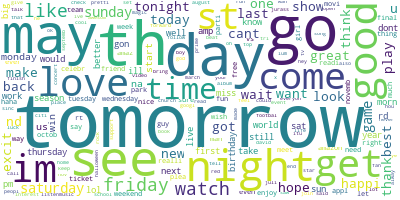

In [26]:
from IPython.display import Image
Image("./images/wordclouds/mywc_positive.png")

Below we have also a bar chart in order to see the most common words in the positive tweets.

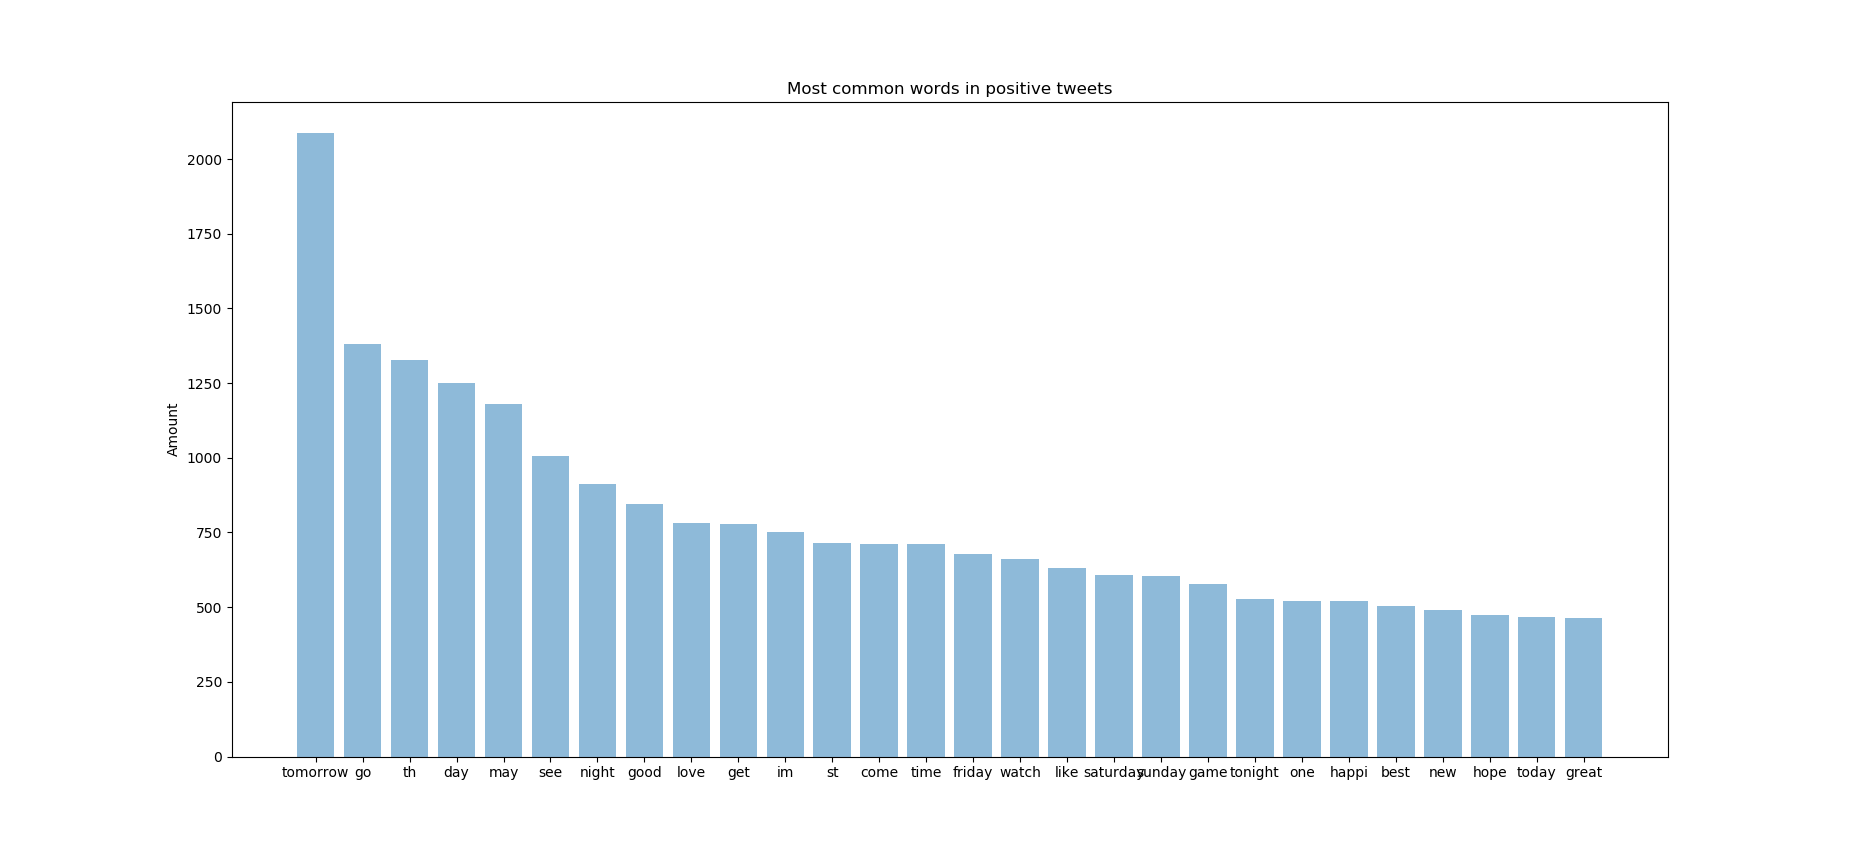

In [27]:
Image("./images/bar_charts/most_common_words_in_positive_tweets.png")

We do the same proccess as above for the negative, the neutral and all the tweets.

In [28]:
tweet_list = []
split_it_pos = []
for x in range(len(filtered_negative_sentences)):                  #for every list inside the filtered_negative_sentences list
	tweet_list.append(' '.join(filtered_negative_sentences[x]))    #take the tokens separated with commas and make it all a tweet-string again

string = ' '.join(tweet_list)                                      #make a string from all the tweets in the list tweet_list
split_it = string.split()                                          #split the string in words and save a list of them in split_it 
print ("Most common words after cleaning for negative tweets")
counter = Counter(split_it)                                        #we take the dictionary 
print(counter.most_common(8))                                      #count the most common words from split_it
print()

wordcloud = WordCloud(background_color="white").generate_from_frequencies(counter)  #generate wordcloud from frequencies
wordcloud.to_file("./images/wordclouds/mywc_negative.png")  

Most common words after cleaning for negative tweets
[('may', 646), ('tomorrow', 612), ('go', 581), ('th', 392), ('like', 362), ('im', 336), ('day', 323), ('get', 323)]



Now we can see the wordcloud that we created from the negative tweets and the frequencies of the words.

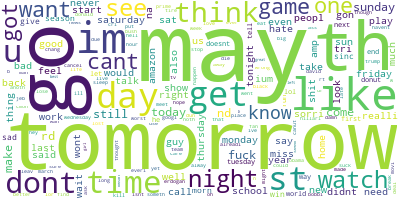

In [29]:
Image("./images/wordclouds/mywc_negative.png")


Below we have also a bar chart in order to see the most common words in the negative tweets.

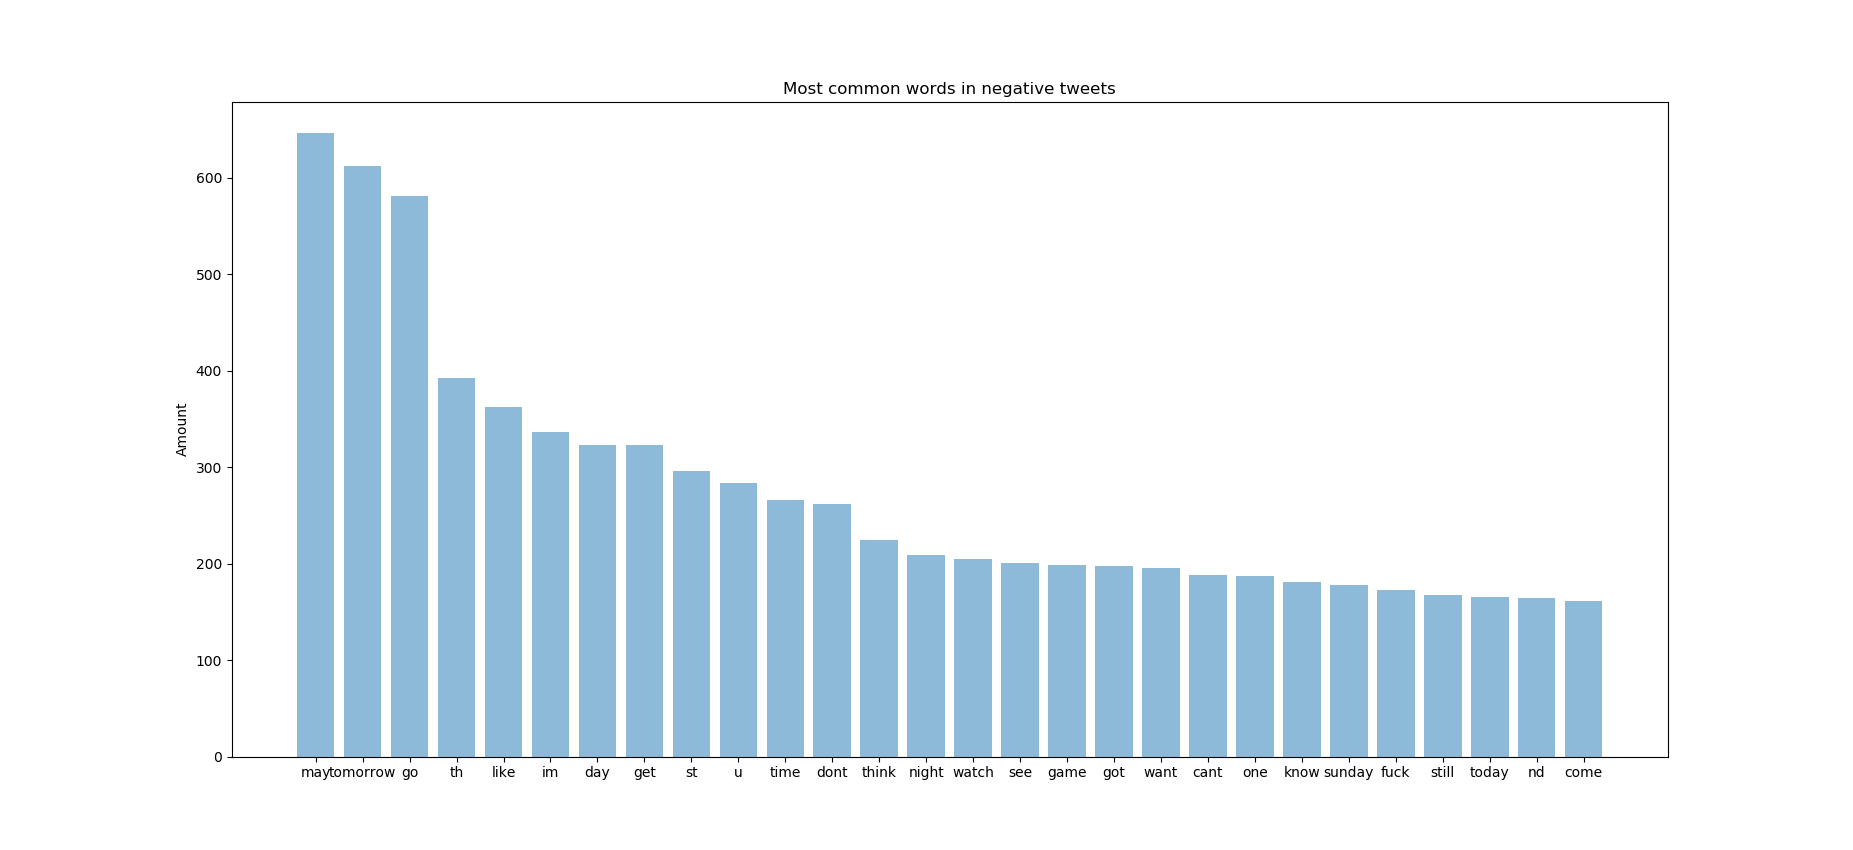

In [30]:
Image("./images/bar_charts/most_common_words_in_negative_tweets.png")

Now for the neutral tweets:

In [31]:
all_tweets.append(tweet_list)

tweet_list = []
split_it_pos = []
for x in range(len(filtered_neutral_sentences)):                  #for every list inside the filtered_neutral_sentences list
	tweet_list.append(' '.join(filtered_neutral_sentences[x]))    #take the tokens separated with commas and make it all a tweet-string again

string = ' '.join(tweet_list)                                      #make a string from all the tweets in the list tweet_list
split_it = string.split()                                          #split the string in words and save a list of them in split_it 
print ("Most common words after cleaning for neutral tweets")
counter = Counter(split_it)                                        #we take the dictionary 
print(counter.most_common(8))                                      #count the most common words from split_it
print()

wordcloud = WordCloud(background_color="white").generate_from_frequencies(counter)  #generate wordcloud from frequencies
wordcloud.to_file("./images/wordclouds/mywc_neutral.png")                                               # Export my wordcloud image 

all_tweets.append(tweet_list)


Most common words after cleaning for neutral tweets
[('tomorrow', 1685), ('go', 1622), ('th', 1414), ('may', 1151), ('day', 902), ('u', 769), ('night', 746), ('time', 712)]



Now we can see the wordcloud that we created from the neutral tweets and the frequencies of the words.

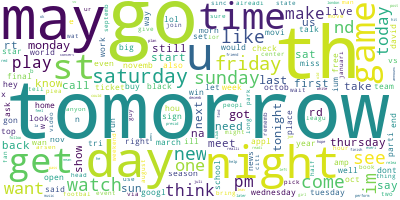

In [32]:
Image("./images/wordclouds/mywc_neutral.png")

Below we have also a bar chart in order to see the most common words in the neutral tweets.

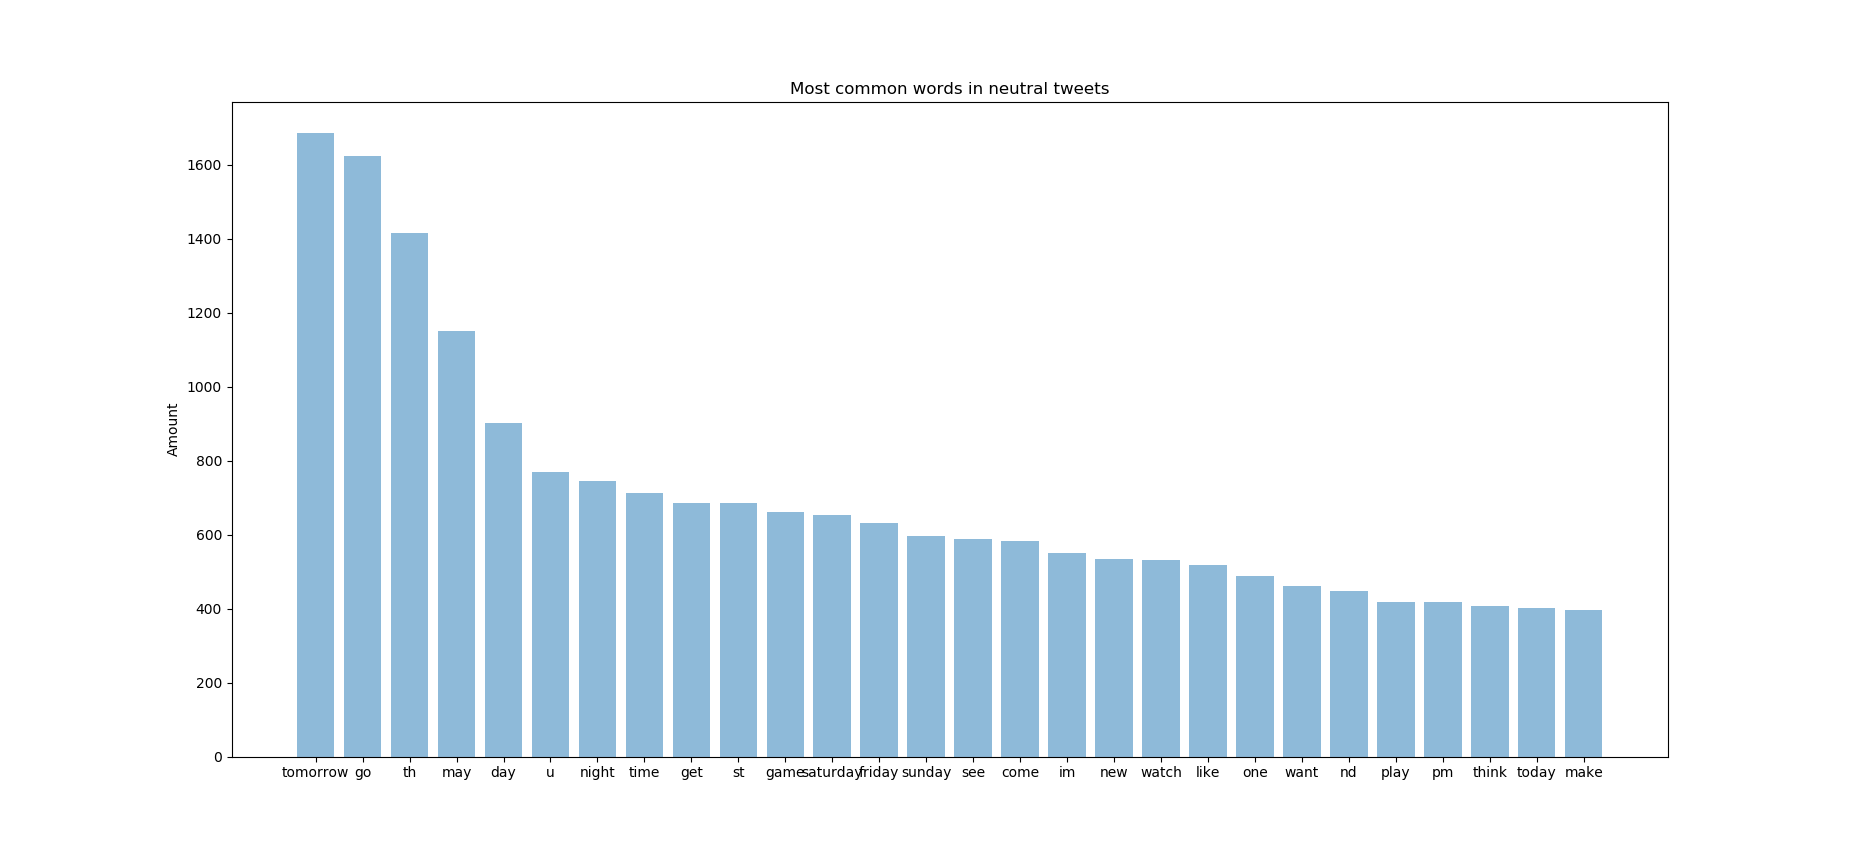

In [33]:
Image("./images/bar_charts/most_common_words_in_neutral_tweets.png")

Now we will use removeNestings() function in order to get the final_list with all the tweets since all_tweets is a list with 3 lists inside it, one for every category of sentiment with all the tweets in this category. In this way we can find the most common words in all the tweets

In [34]:
final_list = []
def removeNestings(l):
    for i in l: 
        if type(i) == list: 
            removeNestings(i) 
        else: 
            final_list.append(i) 

removeNestings(all_tweets)                                       #we remove the nesting and now we have one big list with all the tweets
string = ' '.join(final_list)                              
split_it = string.split()

print ("Most common words after cleaning for all tweets")
counter = Counter(split_it)                                        #we take the dictionary 
print(counter.most_common(8))                                      #count the most common words from split_it
print()

wordcloud = WordCloud(background_color="white").generate_from_frequencies(counter)  #generate wordcloud from frequencies
wordcloud.to_file("./images/wordclouds/mywc_all.png")   

Most common words after cleaning for all tweets
[('tomorrow', 4384), ('go', 3584), ('th', 3132), ('may', 2977), ('day', 2475), ('night', 1869), ('see', 1796), ('get', 1788)]



Now we can see the wordcloud that we created from all tweets and the frequencies of the words.

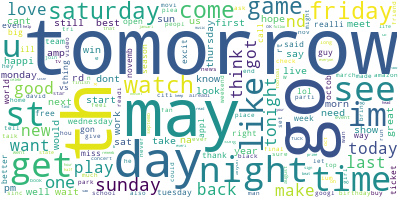

In [35]:
Image("./images/wordclouds/mywc_all.png")

Below we have also a bar chart in order to see the most common words in all tweets.

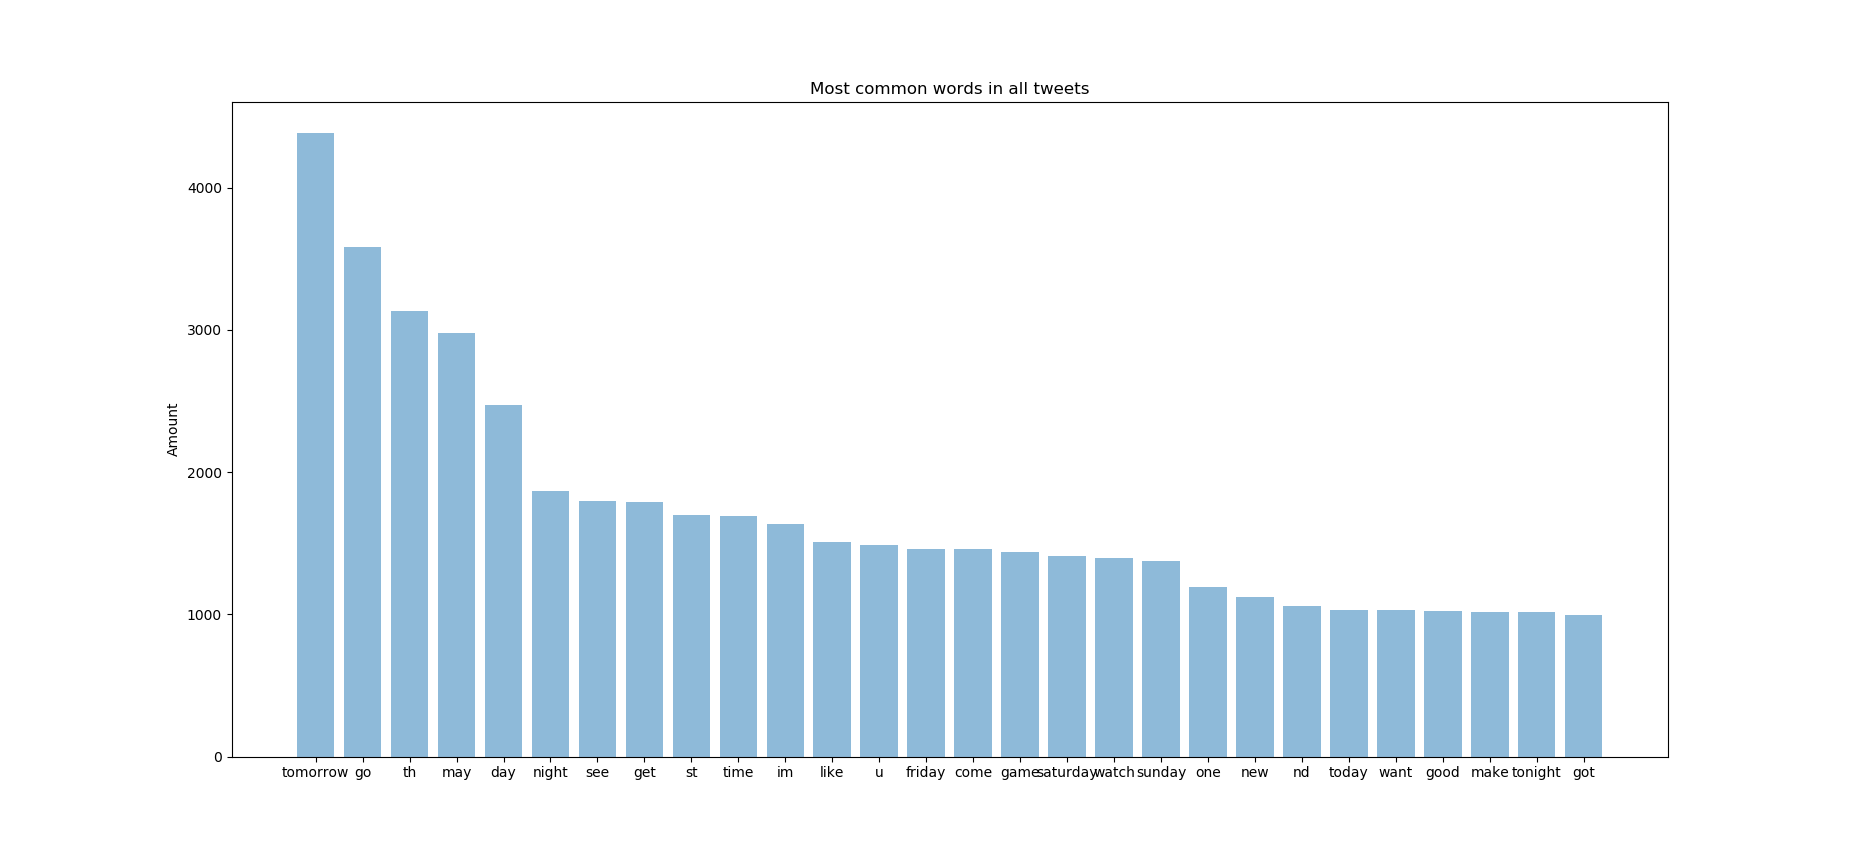

In [36]:
Image("./images/bar_charts/most_common_words_in_all_tweets.png")

In the second part below we will do the vectorization and the classification. We will use three methods: bag of words, tfidf and word embeddings. We will also need at some point to do some cleaning of the data that's why we will use some functions that we created. At the part above we didn't use these functions because we wanted to do it step by step.

Cleaning functions:

In [37]:
def removePunctuation(dataframe):
    tweets = []                                                        
    for x in range(len(dataframe)):                                 
        tweets.append(dataframe['Tweet'][x])                     #append only the Tweet column to the list

    for x in range(len(tweets)):                                                                        #for every tweet in the list of positive tweets
        tweets[x] = re.sub('http://\S+|https://\S+', '', tweets[x])                                     #remove the urls
        tweets[x] = re.sub('@\S+', '', tweets[x])                                                       #remove the tags
        tweets[x] = re.sub('[0-9`~!@#\$%^&\*\(\)\-\_\=\+\[\]\{\}\\\|\;\:<\,.\>\/\?\'\"]','', tweets[x]) #remove the symbols
        tweets[x] = tweets[x].lower()
    
    return tweets

from nltk import word_tokenize
from nltk.corpus import stopwords

def removeStopwords(tweets):
    tokens = []
    for x in range(len(tweets)):                         #for every tweet in list of tweets
        tokens.append(word_tokenize(tweets[x]))          #tokenize the tweet and append it to the list of tokens
                                                        #now every tweet is a list of tokens and tokens is a list of list of tokens

    filtered_words = []
    filtered_sentences = []
    for sentence in range(len(tokens)):                                    #for every list-tweet in tokens
        for word in range(len(tokens[sentence])):                          #take every token-word of the tweet
            if tokens[sentence][word] not in stopwords.words('english'):   #if the token is not a stopword
                filtered_words.append(tokens[sentence][word])     #append the word to the list of filtered positive words
                
        filtered_sentences.append(filtered_words)                 #append the list of non stopwords of the tweet in a list
        filtered_words = []                                                #initialize again the list for the next tweet in the positive_tokens list
                                                                                    #here we create a new positive_tokens list of list of tokens that there are
                                                                                    #no stopwords  
    return filtered_sentences

This function below is called from the bow_train_split where we use the bag of words method in the train data using train_test_split(). We used this way in order to have results quickly and later we will use the train and test data.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer 

def bag_of_words(tweets):
    bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
    index = 0
    for tweet in tweets:
        tweets[index] = ' '.join(tweet)
        index = index + 1  
    bow_xtrain = bow_vectorizer.fit_transform(tweets)  #TWEETS : a list with the actual tweets 
    return bow_xtrain

Bag of words with train split. We will first do preproccessing --> removePuctuation, removeStopwords and create a bag of words model with the bag_of_words() function that we created above.

In [39]:
import time
start = time.time()

import pandas as pd
#train_file = r'./small_train.tsv'
train_file = r'../twitter_data/train2017.tsv'

train_dataframe = pd.read_csv(train_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
from sklearn.model_selection import train_test_split

#Preproccessing (train tweets)
train_tweets = removePunctuation(train_dataframe)  
filtered_train_tweets = removeStopwords(train_tweets)
bow_xtrain = bag_of_words(filtered_train_tweets)

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_xtrain, train_dataframe['Sentiment'], random_state=42, test_size=0.2) #input for this method is any array of features


After the preproccessing we will do the classification. First we will use KNN with n_neighbors=1 and then SVM. We use both accuracy_score() and f1_score() to see the accuracy.

In [40]:
#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain_bow , ytrain)
pred_Y = knn.predict(xvalid_bow)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print("Bag of words/KNN\nmetrics.accuracy_score(yvalid, pred_Y)=")
print(metrics.accuracy_score(yvalid, pred_Y))
print("\n")
"""
print("yvalid=")
print(yvalid)
print("pred_Y=")
print(pred_Y)
"""
from sklearn.metrics import f1_score
import numpy as np
print("Bag of words/KNN\nf1_score(average=micro)=")
print(f1_score(yvalid, pred_Y, average='micro', labels=np.unique(pred_Y))) #seems the same as with accuracy
print("\n")

#Classification with SVM
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(xtrain_bow, ytrain)
pred_Y = svc.predict(xvalid_bow)

print("Bag of words/SVM\nf1_score(average=macro)=")
print(f1_score(yvalid, pred_Y, average='macro'))

end = time.time()
print()
print(end-start)

Bag of words/KNN
metrics.accuracy_score(yvalid, pred_Y)=
0.4636981402002861


Bag of words/KNN
f1_score(average=micro)=
0.4636981402002861


Bag of words/SVM
f1_score(average=macro)=
0.5810893088661372

836.8379492759705


We will use now bag of words with train and test data. Below we do the preproccessing and later we will do the classification.

In [44]:
import time
start = time.time()

#train_file = r'./small_train.tsv'
#test_file = r'./small_test.tsv'
#test_solutions = r'./small_test_solutions.tsv'

train_file = r'../twitter_data/train2017.tsv'
test_file = r'../twitter_data/test2017.tsv'
test_solutions = r'../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'

train_dataframe = pd.read_csv(train_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
test_dataframe = pd.read_csv(test_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
test_solutions_dataframe = pd.read_csv(test_solutions, sep='\t', names=['ID','Sentiment'])

#Preproccessing (train tweets)
train_tweets = removePunctuation(train_dataframe)  
filtered_train_tweets = removeStopwords(train_tweets)

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
index = 0
for tweet in filtered_train_tweets:
    filtered_train_tweets[index] = ' '.join(tweet)
    index = index + 1  
xtrain_bow = bow_vectorizer.fit_transform(filtered_train_tweets)  #TWEETS : a list with the actual tweets

#Preproccessing (test tweets)
test_tweets = removePunctuation(test_dataframe)
filtered_test_tweets = removeStopwords(test_tweets)

index = 0
for tweet in filtered_test_tweets:
    filtered_test_tweets[index] = ' '.join(tweet)
    index = index + 1  
xvalid_bow = bow_vectorizer.transform(filtered_test_tweets) # transform is needed to have the same dimension like xtrain_bow

#Calculate ytrain
train_sentiment = []
for x in range(len(train_dataframe)): 
    train_sentiment.append(train_dataframe['Sentiment'][x])
ytrain = np.array(train_sentiment)

#Calculate yvalid
test_sentiment = []
for x in range(len(test_solutions_dataframe)): 
    test_sentiment.append(test_solutions_dataframe['Sentiment'][x])
yvalid = np.array(test_sentiment)

Now we will do the classification.

In [45]:
#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain_bow , ytrain)
pred_Y = knn.predict(xvalid_bow)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print("Bag of words/KNN\nmetrics.accuracy_score(yvalid, pred_Y)=")
print(metrics.accuracy_score(yvalid, pred_Y))
print("\n")
"""
print("yvalid=")
print(yvalid)
print("pred_Y=")
print(pred_Y)
"""
from sklearn.metrics import f1_score
import numpy as np
print("Bag of words/KNN\nf1_score(average=micro)=")
print(f1_score(yvalid, pred_Y, average='micro', labels=np.unique(pred_Y))) #seems the same as with accuracy
print("\n")

#Classification with SVM
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(xtrain_bow, ytrain)
pred_Y = svc.predict(xvalid_bow)

print("Bag of words/SVM\nf1_score(average=macro)=")
print(f1_score(yvalid, pred_Y, average='macro'))

end = time.time()
print()
print(end-start)

MemoryError: 

Below we can see the different results that bag of words produced with different values in Knn's n_neighbors which is the number of neighbors. We also put the result from svm in order to compare it with the one from Knn. The green is the best value and the red is the words value.

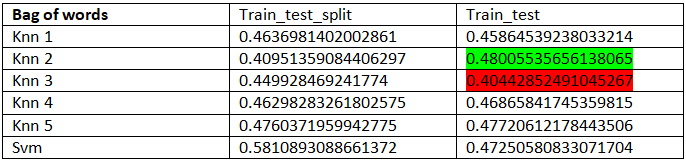

In [46]:
from IPython.display import Image
Image("./images/classification/bow.png")

This is the Tfidf() function that we created and it makes, fit_transforms and returns a tfidf model.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
def Tfidf(tweets):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
    index = 0
    for tweet in tweets:
        tweets[index] = ' '.join(tweet)
        index = index + 1  
    tfidf = tfidf_vectorizer.fit_transform(tweets)
    return tfidf

Tfidf with train_test_split(). 
Preprocessing:

In [48]:
import time
start = time.time()

import pandas as pd
train_file = r'../twitter_data/train2017.tsv'

train_dataframe = pd.read_csv(train_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
from sklearn.model_selection import train_test_split

#Preproccessing (train tweets)
train_tweets = removePunctuation(train_dataframe)  
filtered_train_tweets = removeStopwords(train_tweets)
tfidf_xtrain = Tfidf(filtered_train_tweets)

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_xtrain, train_dataframe['Sentiment'], random_state=42, test_size=0.2) #input for this method is any array of features


Classification:

In [49]:
#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain_tfidf , ytrain)
pred_Y = knn.predict(xvalid_tfidf)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print("TFIDF/KNN\nmetrics.accuracy_score(yvalid, pred_Y)=")
print(metrics.accuracy_score(yvalid, pred_Y))
print("\n")
"""
print("yvalid=")
print(yvalid)
print("pred_Y=")
print(pred_Y)
"""

from sklearn.metrics import f1_score
import numpy as np
print("TFIDF/KNN\nf1_score(average=micro)=")
print(f1_score(yvalid, pred_Y, average='micro', labels=np.unique(pred_Y))) #seems the same as with accuracy
print("\n")

#Classification with SVM
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(xtrain_tfidf, ytrain)
pred_Y = svc.predict(xvalid_tfidf)

print("TFIDF/SVM\nf1_score(average=macro)=")
print(f1_score(yvalid, pred_Y, average='macro'))

end = time.time()
print()
print(end-start)

MemoryError: 

Tfidf with train test data. Preproccessing:

In [ ]:
import time
start = time.time()

import numpy as np
import pandas as pd

train_file = r'../twitter_data/train2017.tsv'
test_file = r'../twitter_data/test2017.tsv'
test_solutions = r'../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'

train_dataframe = pd.read_csv(train_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
test_dataframe = pd.read_csv(test_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
test_solutions_dataframe = pd.read_csv(test_solutions, sep='\t', names=['ID','Sentiment'])

from sklearn.feature_extraction.text import TfidfVectorizer

#Preproccessing (train tweets)
train_tweets = removePunctuation(train_dataframe)  
filtered_train_tweets = removeStopwords(train_tweets)

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
index = 0
for tweet in filtered_train_tweets:
    filtered_train_tweets[index] = ' '.join(tweet)
    index = index + 1  
xtrain_tfidf = tfidf_vectorizer.fit_transform(filtered_train_tweets)  #TWEETS : a list with the actual tweets

#Preproccessing (test tweets)
test_tweets = removePunctuation(test_dataframe)
filtered_test_tweets = removeStopwords(test_tweets)

index = 0
for tweet in filtered_test_tweets:
    filtered_test_tweets[index] = ' '.join(tweet)
    index = index + 1  
xvalid_tfidf = tfidf_vectorizer.transform(filtered_test_tweets) # transform is needed to have the same dimension like xtrain_bow

#Calculate ytrain
train_sentiment = []
for x in range(len(train_dataframe)): 
    train_sentiment.append(train_dataframe['Sentiment'][x])
ytrain = np.array(train_sentiment)

#Calculate yvalid
test_sentiment = []
for x in range(len(test_solutions_dataframe)): 
    test_sentiment.append(test_solutions_dataframe['Sentiment'][x])
yvalid = np.array(test_sentiment)

Classification:

In [ ]:
#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain_tfidf , ytrain)
pred_Y = knn.predict(xvalid_tfidf)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print("TFIDF/KNN\nmetrics.accuracy_score(yvalid, pred_Y)=")
print(metrics.accuracy_score(yvalid, pred_Y))
print("\n")
"""
print("yvalid=")
print(yvalid)
print("pred_Y=")
print(pred_Y)
"""
from sklearn.metrics import f1_score
import numpy as np
print("TFIDF/KNN\nf1_score(average=micro)=")
print(f1_score(yvalid, pred_Y, average='micro', labels=np.unique(pred_Y))) #seems the same as with accuracy
print("\n")

#Classification with SVM
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(xtrain_tfidf, ytrain)
pred_Y = svc.predict(xvalid_tfidf)

print("TFIDF/SVM\nf1_score(average=macro)=")
print(f1_score(yvalid, pred_Y, average='macro'))

end = time.time()
print()
print(end-start)

Again, below we can see the different results that tfidf produced with different values in Knn's n_neighbors. We also put the result from svm in order to compare it with the one from Knn. The green is the best value and the red is the words value.

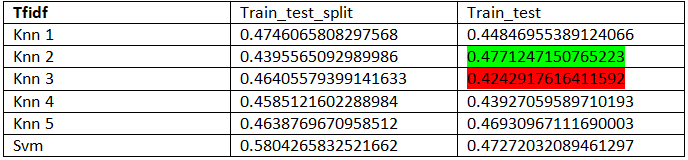

In [50]:
from IPython.display import Image
Image("./images/classification/tfidf.png")

Below we have the tweetVectorization() function that is being used in order to transform every tweet into a vector of features. We call this function whenever we want to use word2vec for the vectorization.  

In [56]:
#for gensim write in a terminal the following: pip install -U gensim

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

def tweetVectorization(filtered_sentences):
    """
    model_w2v = Word2Vec(
                filtered_sentences,
                size=200, # desired no. of features/independent variables
                window=5, # context window size
                min_count=2,
                sg = 1, # 1 for skip-gram model
                hs = 0,
                negative = 10, # for negative sampling
                workers= 2, # no.of cores
                seed = 34) 

    model_w2v.train(filtered_sentences, total_examples= len(filtered_sentences), epochs=20)
    """
    model_w2v = Word2Vec.load('model_w2v.bin')
    words = list(model_w2v.wv.vocab)
    
    dataframe = pd.DataFrame()
    tweet_counter = 0
    for sentence in range(len(filtered_sentences)):
        counter = 0
        sum = np.zeros((1,200))
        tweet_counter += 1 
        for word in range(len(filtered_sentences[sentence])):
            counter+=1
            #print(filtered_sentences[sentence][word])
            if(filtered_sentences[sentence][word] in words):
                sum += model_w2v.wv[filtered_sentences[sentence][word]]
            else:
                # 1) do nothing (such as add a vector of zeroes/zeros)
                # 2) add to sum a vector of mean of the current sum (if the first word is "missing value" then sum remains zero)
                """
                sum += np.divide(sum, counter)
                """
                # 3) get the max and the min of mean of the current sum and create a vector with random numbers between [min,max]
                
                min = np.amin(np.divide(sum, counter))
                max = np.amax(np.divide(sum, counter))
                sum += np.random.uniform(low=min, high=max, size=len(sum))
                
                # 4) add a vector of random values in a random range
                """
                sum += np.random.uniform(low=-1.5243325, high=1.5068232, size=len(sum))
                """
        if (counter == 0):
            counter = 1   
        vector = np.divide(sum, counter)
        df = pd.DataFrame(vector) 
        dataframe = dataframe.append(df)
    return dataframe

After we have trained our word2vec model then we have a vocabulary from our given tweets and every word inside it has 200 features. We use tsne in order to have dimensionality reduction and be able to have a plot in 2 dimensions for the vocabulary. Since the size of the vocabulary is too big and the plot is not clear we reduced the words that would appear to the tsne plot in only 140.  

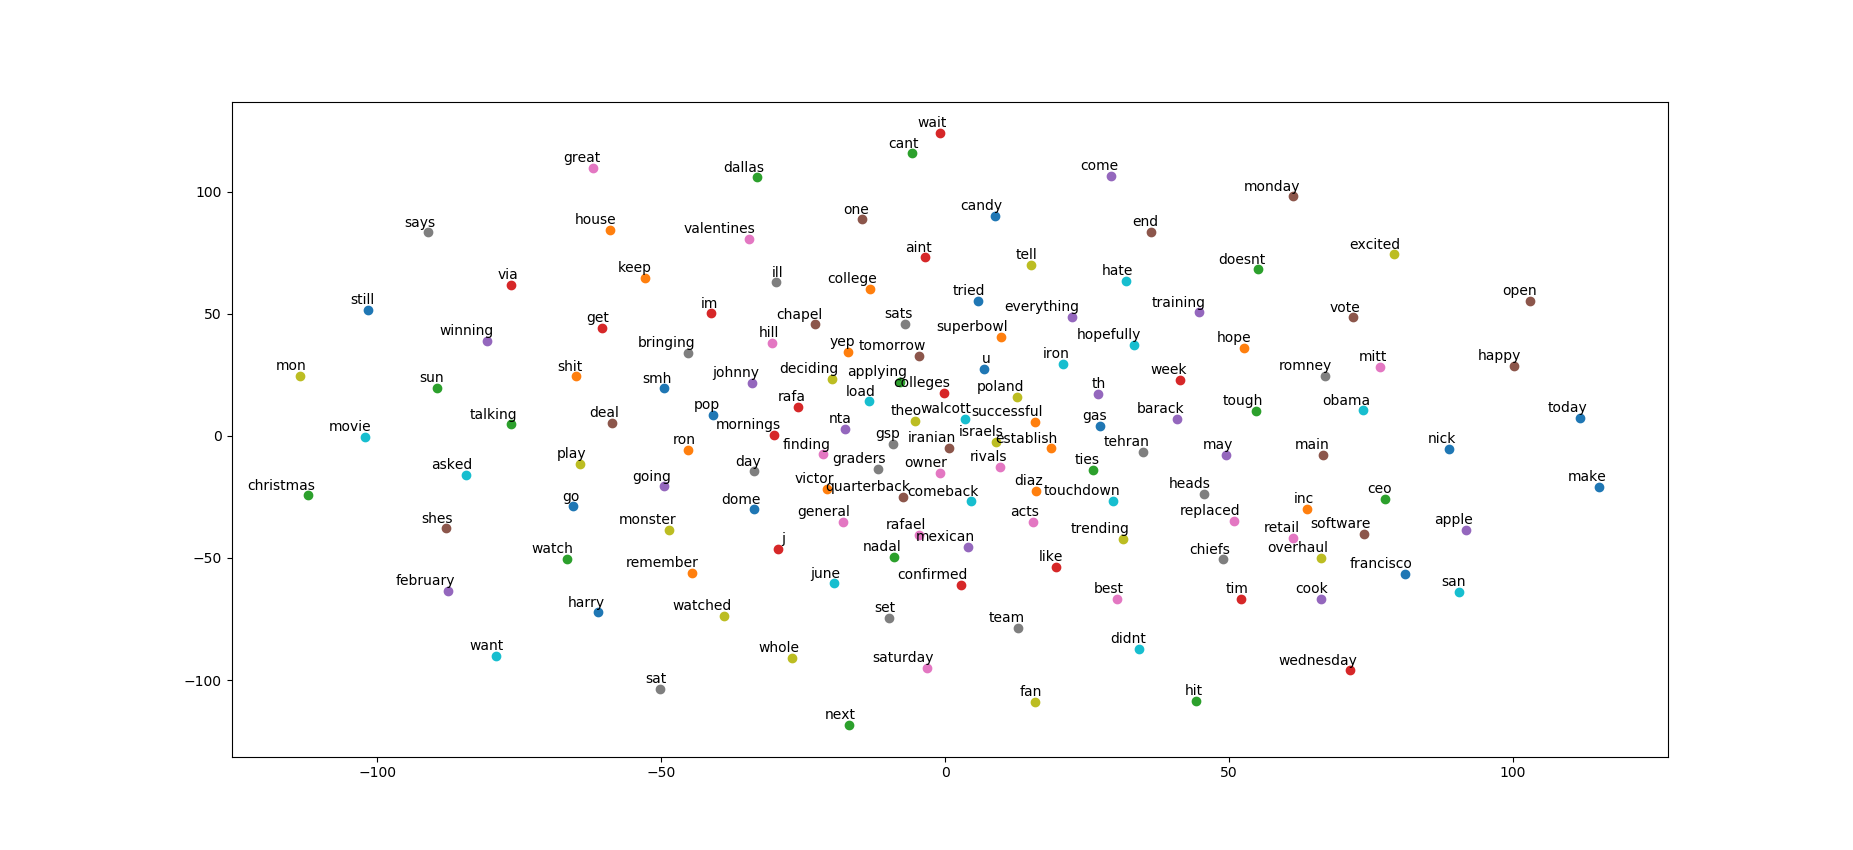

In [57]:
from IPython.display import Image
Image("./images/tsne_plots/tsne_140.png")

The tsne_plot() function that we used in order to produce the result above.

In [58]:
"""
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
            textcoords='offset points',
                        ha='right',
                        va='bottom')
    plt.show()
"""

'\nfrom sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\ndef tsne_plot(model):\n    "Creates and TSNE model and plots it"\n    labels = []\n    tokens = []\n    for word in model.wv.vocab:\n        tokens.append(model[word])\n        labels.append(word)\n    \n    tsne_model = TSNE(perplexity=40, n_components=2, init=\'pca\', n_iter=2500, random_state=23)\n    new_values = tsne_model.fit_transform(tokens)\n\n    x = []\n    y = []\n\n    for value in new_values:\n        x.append(value[0])\n        y.append(value[1])\n        \n    plt.figure(figsize=(16, 16)) \n    for i in range(len(x)):\n        plt.scatter(x[i],y[i])\n        plt.annotate(labels[i],\n                    xy=(x[i], y[i]),\n                    xytext=(5, 2),\n            textcoords=\'offset points\',\n                        ha=\'right\',\n                        va=\'bottom\')\n    plt.show()\n'

Below we have the functions that are being used in order to search the vocabularies and extract extra features for our vectors, (this is not the bonus part). 

In [59]:
#extra features from vocabularies (THIS IS NOT THE BONUS)
def voc_feature(tweets, lexico_dict):
    meanValenceFeature = []

    for tweet in tweets:                                    #for every tweet
        counter = 0
        sum = 0
        for word in tweet:                                  #for every word
            if (word in lexico_dict['value'].keys()):       #if word is in dictionary
                sum += lexico_dict['value'][word]           #count in its' value
                counter += 1
        if (counter == 0):                                  #if we cannot find any word inside vocabulary we just add zero as extra vocabulary feature for this tweet
            counter = 1
        new_feature = sum/counter                           #the new_feature is the mean of the sum of words' values
        meanValenceFeature.append(new_feature)              #finally, we create this list to hold the extra feature column
    return meanValenceFeature

#tweetLength
def bonus_feature(tweets):
    tweetLength = []

    for tweet in tweets:
        tweetLength.append(len(tweet))                      #we create this list to hold the extra feature(tweet's length) column
    return tweetLength

#Max, min valence of tweet
def bonus_feature_min_max_valence(tweets, lecixo_dict):
	minValenceFeature = []
	maxValenceFeature = []
	for tweet in tweets:                                    #for every tweet
		min_tweet_valence = 5                               #random minimum value
		max_tweet_valence = -5                              #random maximum value
		for word in tweet:                                  #for every word
			if (word in lecixo_dict['value'].keys()):       #find minimum and maximum valence from all its words
				if (min_tweet_valence > lecixo_dict['value'][word]):
					min_tweet_valence = lecixo_dict['value'][word]
				if (max_tweet_valence < lecixo_dict['value'][word]):
					max_tweet_valence = lecixo_dict['value'][word]
		minValenceFeature.append(min_tweet_valence)
		maxValenceFeature.append(max_tweet_valence)
	return minValenceFeature, maxValenceFeature             #return two lists as the extra features columns

We run the word2vec vectorization with the vocabularies: valence_tweet.txt, affin.txt, generic,txt, val.txt plus we have the bonus. The bonus is that we have put some extra features in the vectors except from the vocabularies. First of all we added the length of every tweet in the vector. We also found the min and max valence for every tweet and put it too. 

Note: min valence is the smallest valence that we found in the tweet and max valence is the largest valence that we found. 

Word2vec with all vocabularies plus bonus:

In [ ]:
import time
start = time.time()
import numpy as np
import pandas as pd
from nltk import word_tokenize

train_file = r'../twitter_data/train2017.tsv'
test_file = r'../twitter_data/test2017.tsv'
test_solutions = r'../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'

train_dataframe = pd.read_csv(train_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
test_dataframe = pd.read_csv(test_file, sep='\t', names=['ID1','ID2','Sentiment','Tweet'])
test_solutions_dataframe = pd.read_csv(test_solutions, sep='\t', names=['ID','Sentiment'])

train_tweets = []                                                        
for x in range(len(train_dataframe)):                                 
    train_tweets.append(train_dataframe['Tweet'][x])                    #append only the Tweet column to the list

train_tokens = []
for x in range(len(train_tweets)):                                      #for every tweet in list of tweets
    train_tokens.append(word_tokenize(train_tweets[x]))                 #tokenize the tweet and append it to the list of tokens

test_tweets = []                                                        
for x in range(len(test_dataframe)):                                 
    test_tweets.append(test_dataframe['Tweet'][x])                      #append only the Tweet column to the list

test_tokens = []
for x in range(len(test_tweets)):                                       #for every tweet in list of tweets
    test_tokens.append(word_tokenize(test_tweets[x]))                   #tokenize the tweet and append it to the list of tokens

train_voc_features = []                                                 #this will be a list of lists and every list inside it will be a new column for the vector         
test_voc_features = []                                                  #this will be a list of lists and every list inside it will be a new column for the vector

lexico = r'../lexica/emotweet/valence_tweet.txt'                           
lexico_dataframe = pd.read_csv(lexico, sep='\t', names=['word', 'value']) #read lexico as a dataframe
lexico_dict = lexico_dataframe.set_index('word').to_dict(orient='dict')   #convert it to a dictionary in order to be much faster when we search a word inside it
#print(lexico_dict['value']['nba'])
train_voc_features.append(voc_feature(train_tokens,lexico_dict))          #call voc_feature() and append the list with the features from this lexico to the list of all features
test_voc_features.append(voc_feature(test_tokens,lexico_dict))            #do the same as above for the test data
#Bonus features (Min, Max Tweet Valence)
train_minValenceFeature, train_maxValenceFeature = bonus_feature_min_max_valence(train_tokens, lexico_dict)  #find min and max valence from all tokens from a tweet in lexico
test_minValenceFeature, test_maxValenceFeature = bonus_feature_min_max_valence(test_tokens, lexico_dict)     #we do the same for test data
train_voc_features.append(train_minValenceFeature)                        #just append the new column with features
train_voc_features.append(train_maxValenceFeature)                        #just append the new column with features
test_voc_features.append(test_minValenceFeature)                          #just append the new column with features
test_voc_features.append(test_maxValenceFeature)                          #just append the new column with features
  
lexico = r'../lexica/affin/affin.txt'
lexico_dataframe = pd.read_csv(lexico, sep='\t', names=['word', 'value'])
lexico_dict = lexico_dataframe.set_index('word').to_dict(orient='dict')
#print(lexico_dict['value']['nba'])
train_voc_features.append(voc_feature(train_tokens,lexico_dict))
test_voc_features.append(voc_feature(test_tokens,lexico_dict))
#Bonus features (Min, Max Tweet Valence)
train_minValenceFeature, train_maxValenceFeature = bonus_feature_min_max_valence(train_tokens, lexico_dict)
test_minValenceFeature, test_maxValenceFeature = bonus_feature_min_max_valence(test_tokens, lexico_dict)
train_voc_features.append(train_minValenceFeature)
train_voc_features.append(train_maxValenceFeature)
test_voc_features.append(test_minValenceFeature)
test_voc_features.append(test_maxValenceFeature)

lexico = r'../lexica/generic/generic.txt'
lexico_dataframe = pd.read_csv(lexico, sep='\t', names=['word', 'value'])
lexico_dict = lexico_dataframe.set_index('word').to_dict(orient='dict')
#print(lexico_dict['value']['nba'])
train_voc_features.append(voc_feature(train_tokens,lexico_dict))
test_voc_features.append(voc_feature(test_tokens,lexico_dict))
#Bonus features (Min, Max Tweet Valence)
train_minValenceFeature, train_maxValenceFeature = bonus_feature_min_max_valence(train_tokens, lexico_dict)
test_minValenceFeature, test_maxValenceFeature = bonus_feature_min_max_valence(test_tokens, lexico_dict)
train_voc_features.append(train_minValenceFeature)
train_voc_features.append(train_maxValenceFeature)
test_voc_features.append(test_minValenceFeature)
test_voc_features.append(test_maxValenceFeature)

lexico = r'../lexica/nrctag/val.txt'
lexico_dataframe = pd.read_csv(lexico, sep='\t', names=['word', 'value'])
lexico_dict = lexico_dataframe.set_index('word').to_dict(orient='dict')
#print(lexico_dict['value']['nba'])
train_voc_features.append(voc_feature(train_tokens, lexico_dict))
test_voc_features.append(voc_feature(test_tokens, lexico_dict))
#Bonus features (Min, Max Tweet Valence)
train_minValenceFeature, train_maxValenceFeature = bonus_feature_min_max_valence(train_tokens, lexico_dict)
test_minValenceFeature, test_maxValenceFeature = bonus_feature_min_max_valence(test_tokens, lexico_dict)
train_voc_features.append(train_minValenceFeature)
train_voc_features.append(train_maxValenceFeature)
test_voc_features.append(test_minValenceFeature)
test_voc_features.append(test_maxValenceFeature)

#Bonus Features
train_voc_features.append(bonus_feature(train_tokens))  #this is another extra feature that we will use, it is the length of the tweet
test_voc_features.append(bonus_feature(test_tokens))     

#Preproccessing (train tweets)
train_tweets = removePunctuation(train_dataframe)       #remove punctuation from train tweets
filtered_train_tweets = removeStopwords(train_tweets)   #remove english stopwords from train tweets

#WORD2VEC
train_vector_dataframe = tweetVectorization(filtered_train_tweets)  #create a vector for every train tweet

#Preproccessing (test tweets) 
test_tweets = removePunctuation(test_dataframe)         #remove punctuation from test tweets
filtered_test_tweets = removeStopwords(test_tweets)     #remove english stopwords from test tweets

#WORD2VEC
test_vector_dataframe = tweetVectorization(filtered_test_tweets)    #create a vector for every test tweet

train_X = train_vector_dataframe.values                 #we take the values of the vector as a numpy array

for x in range(len(train_voc_features)):                #for every list of features inside the list train_voc_features
    new_features = np.array(train_voc_features[x])      #we convert the list to a numpy array
    new_features = np.reshape(new_features,(len(train_voc_features[x]),1)) #we reshape from (200,) to(200,1)
    train_X = np.append(train_X, new_features,axis=1)   #now we append this list as a column in the train_X numpy array

#Extra features
test_X = test_vector_dataframe.values                   #we take the values of the vector as a numpy array

for x in range(len(test_voc_features)):
    new_features = np.array(test_voc_features[x])
    new_features = np.reshape(new_features,(len(test_voc_features[x]),1))
    test_X = np.append(test_X, new_features,axis=1)

train_sentiment = []
for x in range(len(train_dataframe)):                       #for every tweet in the train_dataframe
    train_sentiment.append(train_dataframe['Sentiment'][x]) #we take the sentiment and append it in a list
train_Y = np.array(train_sentiment)                         #we convert this list in a numpy array named train_Y as the solutions for the train data

test_sentiment = []
for x in range(len(test_solutions_dataframe)): 
    test_sentiment.append(test_solutions_dataframe['Sentiment'][x])
test_Y = np.array(test_sentiment)

#Classification with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
#WORD2VEC
knn.fit(train_X , train_Y)
pred_Y = knn.predict(test_X)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print("Word2vec(word embeddings)/KNN\nmetrics.accuracy_score(test_Y, pred_Y)=")
print(metrics.accuracy_score(test_Y, pred_Y))

from sklearn.metrics import f1_score
print("Word2vec(word embeddings)/KNN\nf1_score(test_Y, pred_Y, average='micro', labels=np.unique(pred_Y))=")
print(f1_score(test_Y, pred_Y, average='micro', labels=np.unique(pred_Y))) #seems the same as with accuracy

#Classification with SVM
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(train_X, train_Y)
pred_Y = svc.predict(test_X)

print("Word2vec(word embeddings)/SVM\nmetrics.accuracy_score(test_Y, pred_Y)=")
print(metrics.accuracy_score(test_Y, pred_Y))
print("Word2vec(word embeddings)/SVM\nf1_score(test_Y, pred_Y, average='macro')=")
print(f1_score(test_Y, pred_Y, average='macro'))

end = time.time()
print()
print(end-start)

Word2vec(word embeddings)/KNN
metrics.accuracy_score(test_Y, pred_Y)=
0.5702539889286877
Word2vec(word embeddings)/KNN
f1_score(test_Y, pred_Y, average='micro', labels=np.unique(pred_Y))=
0.5702539889286877


Below we have 2 tables in order to see the results that we had while running word2vec: 1) without vocabularies, 2) only with valence_tweet.txt, 3) only with affin.txt, 4) only with generic.txt, 5) only with val.txt, 6) with all vocabularies and 7) with all vocabularies + bonus

Note: In Knn the number of neighbors is 1 (n_neighbors=1).

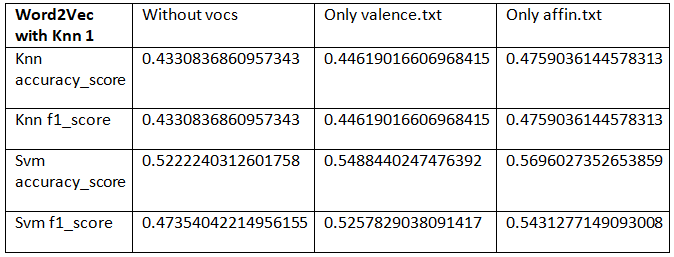

In [1]:
from IPython.display import Image
Image("./images/classification/word2vecknn1.png")

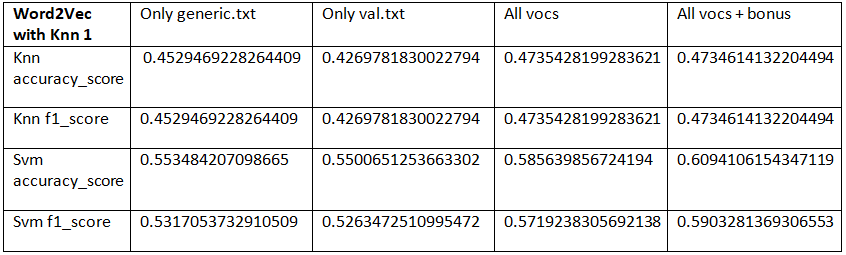

In [2]:
from IPython.display import Image
Image("./images/classification/word2vecknn1cont.png")

We can see from the above tables that the vocabulary affin.txt produced great results in comparison with the other vocabularies alone. It was also a little strange for us to see that it produced better results for the knn even from the last column with all the vocabularies plus the bonus. Nevertheless the best results in svm classifier are with all vocabularies plus bonus and the knn also produced the almost the best results. We can conclude that if we have all the vocabularies and the extra features from the bonus we have the best results.

We compared the results from the knn and svm classifiers and saw a big difference. So we decided that we should search how the knn could produce better results. The number of neighbors that was given to knn was 1 so after trying different values we created the table below. The red was the worst value and the green was the best one.

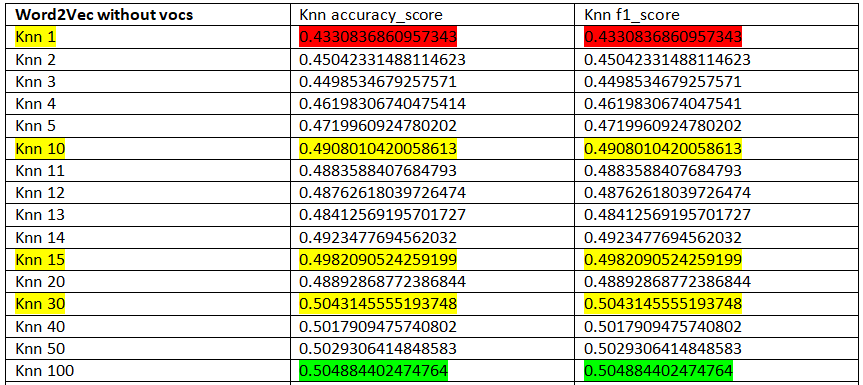

In [3]:
from IPython.display import Image
Image("./images/classification/word2vecwithoutmanyk.png")

The results were very good for us since we saw that the knn probably would produce better results with all the vocabularies and the extra features if we would run it with n_neighbors=30 or n_neighbors=100. So we selected the best 4 values (not 100) from the table above and we created a new table. 

The table below has the final results that knn and svm produced with the different values of n_neighbors in knn. We have to say that the reason we put svm in this table was to see what the average value would be since it does not always produce the same result.

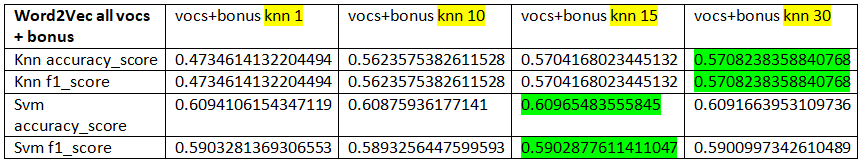

In [4]:
from IPython.display import Image
Image("./images/classification/word2vecallmanyk.png")

Bellow we have the final results. As you can see the best results were produced by the Word2Vec. We also observed that bag of words produced better results than tfidf with Knn classifier but tfidf was better (slightly higher) with svm classifier.

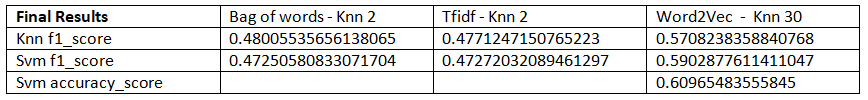

In [5]:
Image("./images/classification/finalresults.png")